Fixing what is wrong with the reflection off of E6?

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_formir import *
from random import uniform
import random

In [24]:
coeffellipse56 = [256.65,248.39,64.58]  #for ellipses 5&6
origin5 = [128.3,-120.501,0] # (ellipse5)
origin6 = [128.3,120.501,0] # (ellipse6)
thet5 = [0,0,-.1164] 
thet6 = [0,0,.1164] #testing
#ELLIPSE 5&6
X5,Y5,Z5,X6,Y6,Z6 = FTSEC(50,np.pi/8, coeffellipse56, 130, 'pos') #LOCAL
X5ni,Y5ni,Z5ni,X6ni,Y6ni,Z6ni = FTSEC(50,np.pi/8, coeffellipse56, 130, 'neg') #LOCAL
#ELLIPSE 5
#Xset5, Yset5, Zset5= transformLG(X5,Y5,Z5,origin5,thet5) #GLOBAL
#Xset6, Yset6, Zset6 = transformLG(X6,Y6,Z6,origin5,thet5) #GLOBAL
#X5,Y5,Z5 = SR2(32.07, Xset5,Yset5,Zset5, origin5) #SELECTED GLOBAL
#X6,Y6,Z6 = SR2(32.07, Xset6, Yset6, Zset6, origin5) #SELECTED GLOBAL
#center5,range5 = xrangeGL6(X5,Y5,Z5,X6,Y6,Z6,origin5,thet5)
#ELLIPSE 6
Xset5n,Yset5n,Zset5n = transformLG(X5ni,Y5ni,Z5ni,origin6,thet6) #GLOBAL
Xset6n,Yset6n,Zset6n = transformLG(X6ni,Y6ni,Z6ni,origin6,thet6) #GLOBAL
X5n,Y5n,Z5n = SR2(32.07,Xset5n,Yset5n,Zset5n,origin6) #SELECTED GLOBAL
X6n,Y6n,Z6n = SR2(32.07,Xset6n,Yset6n,Zset6n,origin6) #SELECTED GLOBAL
center6,range6 = xrangeGL6(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6)
range6 = [30.858585858585872, 100, 31.620798062582999] #testing

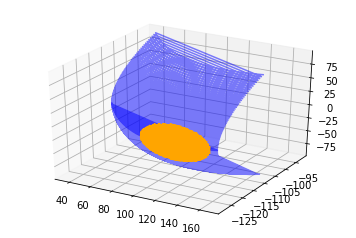

In [25]:
#global
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot(Xset6n,Yset6n,Zset6n, alpha = .5, color = 'blue')
pl3dsurf.plot(Xset5n,Yset5n,Zset5n, alpha = .5, color = 'blue')
pl3dsurf.plot(X5n,Y5n,Z5n, color = 'orange') #global
pl3dsurf.plot(X6n,Y6n,Z6n, color = 'orange')
pl.show()

In [26]:
#use xrange and center to translate to local coordinates 
inside = []
for i in range (0,len(X5ni)):
    if SR3B(range6,X5ni[i],Y5ni[i],Z5ni[i],center6) == True:
        inside.append(i)
xend,yend,zend = [],[],[]
for x in inside:
    xend.append(X5ni[x])
    yend.append(Y5ni[x])
    zend.append(Z5ni[x])
    
inside2 = []
for i in range (0,len(X6ni)):
    if SR3B(range6,X6ni[i],Y6ni[i],Z6ni[i],center6) == True:
        inside2.append(i)
xend2,yend2,zend2 = [],[],[]
for x in inside2:
    xend2.append(X6ni[x])
    yend2.append(Y6ni[x])
    zend2.append(Z6ni[x])
    
#transform directly from local to global
v5nf = sepop(X5n,Y5n,Z5n)
v6nf = sepop(X6n,Y6n,Z6n)
x5nf,y5nf,z5nf = transformGL(X5n,Y5n,Z5n,origin6,thet6)
x6nf,y6nf,z6nf = transformGL(X6n,Y6n,Z6n,origin6,thet6)

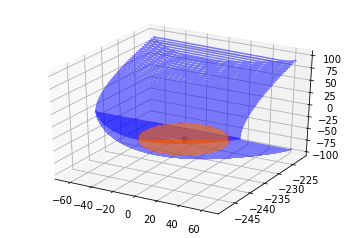

In [27]:
#local transform
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot(X5ni,Y5ni,Z5ni, alpha = .5, color = 'blue')
pl3dsurf.plot(X6ni,Y6ni,Z6ni,alpha = .5, color = 'blue')
pl3dsurf.plot(xend,yend,zend,alpha = .5, color = 'orange')
pl3dsurf.plot(xend2,yend2,zend2, alpha = .5,color = 'orange')
pl3dsurf.scatter(center6[0],center6[1],center6[2], color = 'black',marker = 'o',s = 30)
pl3dsurf.plot(x5nf,y5nf,z5nf, color = 'red', alpha = .2)
pl3dsurf.plot(x6nf,y6nf,z6nf, color = 'red', alpha = .2)
pl.show()

#THE SHARP LINE IS HERE! 
#orange and red should be the same, and aren't. 

In [6]:
#look at xrangeGL6
#used here
#center6,range6 = xrangeGL6(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6)
def xrangeGL6 (x1,y1,z1,x3,y3,z3,origin,thet):
    x,y,z = [],[],[]
    x2,y2,z2 = transformGL(x1,y1,z1,origin,thet)
    x4,y4,z4 = transformGL(x3,y3,z3,origin,thet)
    x.extend(x2),x.extend(x4),y.extend(y2),y.extend(y4),z.extend(z2),z.extend(z4)
    
    xrangeL = np.sqrt((min(x) - max(x))**2)/2
    yrangeL = np.sqrt((min(y) - max(y))**2)/2
    zrangeL = np.sqrt((min(z) - max(z))**2)/2
    
    xcenter = min(x) + xrangeL
    ycenter = min(y) + yrangeL
    zcenter = min(z) + zrangeL
    
    xcenterL = [xcenter,ycenter,zcenter]
    xrangesL = [xrangeL,yrangeL,zrangeL]
    return xcenterL,xrangesL

#3d center in flat euclidean space
def center(x1,y1,z1,x3,y3,z3):
    x,y,z = [],[],[]
    x.extend(x1),x.extend(x3),y.extend(y1),y.extend(y3),z.extend(z1),z.extend(z3)
    xrangeL = np.sqrt((min(x) - max(x))**2)/2
    yrangeL = np.sqrt((min(y) - max(y))**2)/2
    zrangeL = np.sqrt((min(z) - max(z))**2)/2
    xcenter = min(x) + xrangeL
    ycenter = min(y) + yrangeL
    zcenter = min(z) + zrangeL
    center = [xcenter,ycenter,zcenter]
    return center


#do in local
def yofselect(center,coeffellipse):
    x = center[0]
    z = center[2]
    a = coeffellipse[0]
    b = coeffellipse[1]
    y = np.sqrt((1-((x**2)/a**2) - ((z**2)/b**2))*b**2)
    return x,-y,z
    
    

In [7]:
#applying step by step:
x,y,z = [],[],[]
x5nf,y5nf,z5nf = transformGL(X5n,Y5n,Z5n,origin6,thet6)
x6nf,y6nf,z6nf = transformGL(X6n,Y6n,Z6n,origin6,thet6)
x.extend(x5nf),x.extend(x6nf),y.extend(y5nf),y.extend(y6nf),z.extend(z6nf),z.extend(z5nf)

originnew = center(X5n,Y5n,Z5n,X6n,Y6n,Z6n)# need this!
print('global origin of section is: ', originnew) # need this!
ox,oy,oz = transformGL(originnew[0],originnew[1],originnew[2],origin6,thet6)
originnewlocal = sepop(ox,oy,oz)

print('local origin of section is: ', originnewlocal)
xrangeL = np.sqrt((min(x) - max(x))**2)/2
yrangeL = np.sqrt((min(y) - max(y))**2)/2
zrangeL = np.sqrt((min(z) - max(z))**2)/2

print('xrange is: ',xrangeL)
print('xmin is: ', min(x))
print('xmax is: ', max(x))
print('now test this shit')
print('i think this shit is working')

print('yrange is: ',yrangeL)
print('ymin is: ', min(y))
print('ymax is: ', max(y))
print('now test this shit')

print('zrange is: ',zrangeL)
print('zmin is: ', min(z))
print('zmax is: ', max(z))
print('now test this shit')

global origin of section is:  [128.54681761922097, -126.91785561768478, 0.0]
local origin of section is:  [28.979712279424376, -245.71594842480957, 0.0]
xrange is:  30.8585858586
xmin is:  -1.9696969697
xmax is:  59.7474747475
now test this shit
i think this shit is working
yrange is:  3.44673011832
ymin is:  -248.38918721
ymax is:  -241.495726973
now test this shit
zrange is:  31.6207980626
zmin is:  -31.6207980626
zmax is:  31.6207980626
now test this shit


In [8]:
print('local selection center: ', originnewlocal)
recalculatedorigincenter = yofselect(originnewlocal,coeffellipse56)
print('recalculated: ', recalculatedorigincenter)

#so use recalculated now?

local selection center:  [28.979712279424376, -245.71594842480957, 0.0]
recalculated:  (28.979712279424376, -246.80145077062511, 0.0)


In [9]:
#using stuff from above
def xrangeGL8 (x1,y1,z1,x3,y3,z3,origin,thet,coeffellipse):
    x,y,z = [],[],[]
    x2,y2,z2 = transformGL(x1,y1,z1,origin,thet)
    x4,y4,z4 = transformGL(x3,y3,z3,origin,thet)
    x.extend(x2),x.extend(x4),y.extend(y2),y.extend(y4),z.extend(z2),z.extend(z4)
    
    originnew = center(x1,y1,z1,x3,y3,z3)
    ox,oy,oz = transformGL(originnew[0],originnew[1],originnew[2],origin6,thet6)
    originnewlocal = sepop(ox,oy,oz)
    recalculatedorigincenter = yofselect(originnewlocal,coeffellipse)
    
    xrangeL = np.sqrt((min(x) - max(x))**2)/2
    yrangeL = np.sqrt((min(y) - max(y))**2)/2
    zrangeL = np.sqrt((min(z) - max(z))**2)/2
    xrangesL = [xrangeL,yrangeL,zrangeL]
    return recalculatedorigincenter,xrangesL

In [10]:
#using stuff from above
def xrangeGL7 (x1,y1,z1,x3,y3,z3,origin,thet):
    x,y,z = [],[],[]
    x2,y2,z2 = transformGL(x1,y1,z1,origin,thet)
    x4,y4,z4 = transformGL(x3,y3,z3,origin,thet)
    x.extend(x2),x.extend(x4),y.extend(y2),y.extend(y4),z.extend(z2),z.extend(z4)
    
    originnew = center(x1,y1,z1,x3,y3,z3)
    ox,oy,oz = transformGL(originnew[0],originnew[1],originnew[2],origin6,thet6)
    originnewlocal = sepop(ox,oy,oz)
    
    
    xrangeL = np.sqrt((min(x) - max(x))**2)/2
    yrangeL = np.sqrt((min(y) - max(y))**2)/2
    zrangeL = np.sqrt((min(z) - max(z))**2)/2
    xrangesL = [xrangeL,yrangeL,zrangeL]
    return originnewlocal,xrangesL

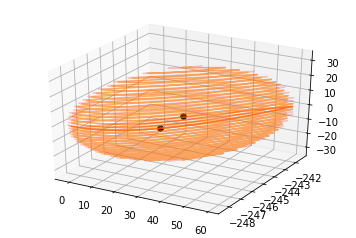

In [28]:
#so try it all again but with xrangeGL7 instad of xrangeGL6
x7center6,x7range6 = xrangeGL8(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6,coeffellipse56)
#use xrange and center to translate to local coordinates 
#make up shit
x7range6 = 30.858585858585872, 200, 31.620798062582999
inside = []
for i in range (0,len(X5ni)):
    if SR3B(x7range6,X5ni[i],Y5ni[i],Z5ni[i],x7center6) == True:
        inside.append(i)
xend,yend,zend = [],[],[]
for x in inside:
    xend.append(X5ni[x])
    yend.append(Y5ni[x])
    zend.append(Z5ni[x])
    
inside2 = []
for i in range (0,len(X6ni)):
    if SR3B(x7range6,X6ni[i],Y6ni[i],Z6ni[i],x7center6) == True:
        inside2.append(i)
xend2,yend2,zend2 = [],[],[]
for x in inside2:
    xend2.append(X6ni[x])
    yend2.append(Y6ni[x])
    zend2.append(Z6ni[x])
    
#transform directly from local to global
v5nf = sepop(X5n,Y5n,Z5n)
v6nf = sepop(X6n,Y6n,Z6n)
x5nf,y5nf,z5nf = transformGL(X5n,Y5n,Z5n,origin6,thet6)
x6nf,y6nf,z6nf = transformGL(X6n,Y6n,Z6n,origin6,thet6)
#local transform
pl3dsurf = pl.figure().gca(projection = '3d')
#pl3dsurf.plot(X5ni,Y5ni,Z5ni, alpha = .5, color = 'blue')
#pl3dsurf.plot(X6ni,Y6ni,Z6ni,alpha = .5, color = 'blue')
pl3dsurf.plot(xend,yend,zend,alpha = .5, color = 'orange')
pl3dsurf.plot(xend2,yend2,zend2, alpha = .5,color = 'orange')
pl3dsurf.scatter(center6[0],center6[1],center6[2], color = 'black',marker = 'o',s = 30)
pl3dsurf.scatter(x7center6[0],x7center6[1],x7center6[2], color = 'black',marker = 'o',s = 30)
pl3dsurf.plot(x5nf,y5nf,z5nf, color = 'red', alpha = .2)
pl3dsurf.plot(x6nf,y6nf,z6nf, color = 'red', alpha = .2)
pl.show()
#should be the same but still differences
#WHY are the centers different

In [22]:
print(max(xend))
print(max(x5nf))
#SHOULD BE THE SAME WTF
print(x8center6)
print(center6)
print(x7range6)
#ok so y is arbitrary??? 

59.7474747475
59.7474747475
(28.979712279424376, -246.80145077062511, 0.0)
[28.8888888888889, -244.94245709119349, 0.0]
(30.858585858585872, 100, 31.620798062583)


so basically just set yrange to be 100 because yeah. 